# "Importing Libraries"

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
plt.style.use('dark_background')

# "Reading Data"

In [3]:
dataset = pd.read_csv('aug_train.csv')
dataset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


# "Data Information For (Data_Train)"

In [4]:
dataset.info()
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [5]:
dataset.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [6]:
dataset.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [7]:
dataset.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


# "Data Visualization For (Data_Train)"

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='count'>

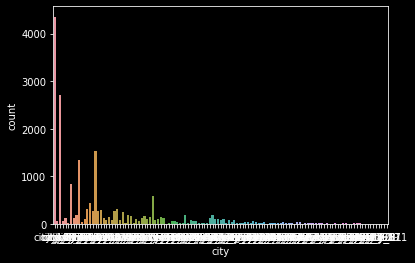

In [8]:
sns.countplot (dataset['city'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_development_index', ylabel='count'>

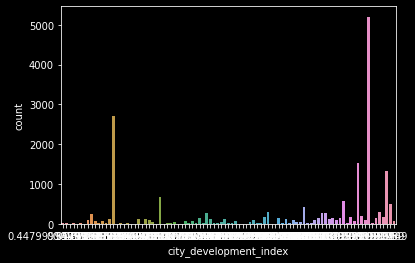

In [9]:
sns.countplot (dataset['city_development_index'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

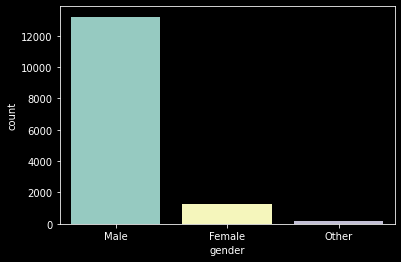

In [10]:
sns.countplot (dataset['gender'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

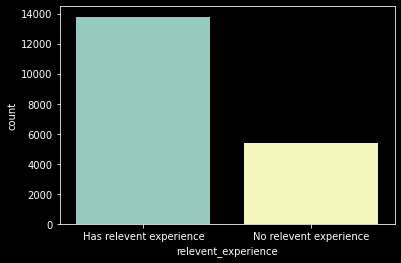

In [11]:
sns.countplot (dataset['relevent_experience'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

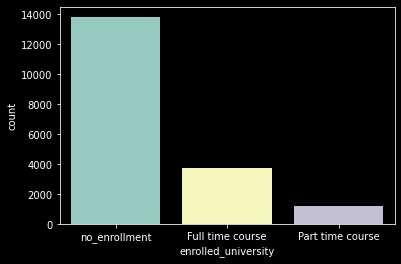

In [12]:
sns.countplot (dataset['enrolled_university'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_level', ylabel='count'>

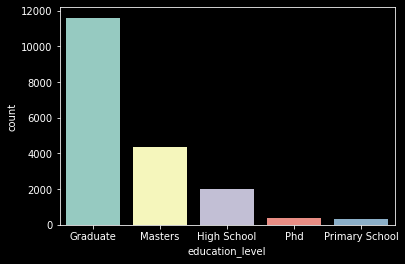

In [13]:
sns.countplot (dataset['education_level'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='major_discipline', ylabel='count'>

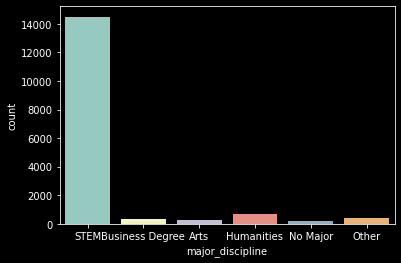

In [14]:
sns.countplot (dataset['major_discipline'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='experience', ylabel='count'>

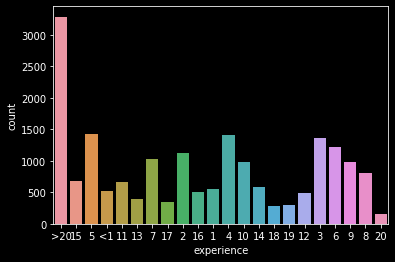

In [15]:
sns.countplot (dataset['experience'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='company_size', ylabel='count'>

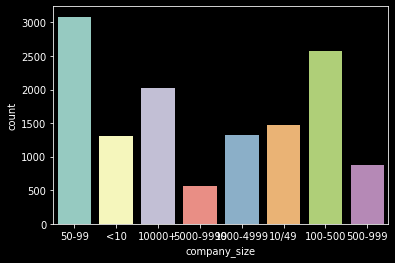

In [16]:
sns.countplot (dataset['company_size'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='company_type', ylabel='count'>

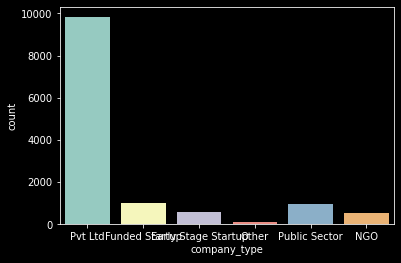

In [17]:
sns.countplot (dataset['company_type'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_new_job', ylabel='count'>

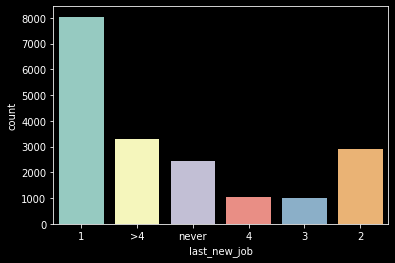

In [18]:
sns.countplot (dataset['last_new_job'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='training_hours', ylabel='count'>

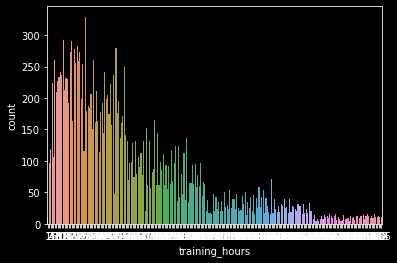

In [19]:
#plt.figure(figsize=(20, 15))
sns.countplot (dataset['training_hours'])

# "Data Splitting From (Data_Train) To (X_Train & Y_Train)"

In [20]:
x = dataset.iloc[:,:-1].values
x

array([[8949, 'city_103', 0.92, ..., nan, '1', 36],
       [29725, 'city_40', 0.7759999999999999, ..., 'Pvt Ltd', '>4', 47],
       [11561, 'city_21', 0.624, ..., nan, 'never', 83],
       ...,
       [24576, 'city_103', 0.92, ..., 'Pvt Ltd', '4', 44],
       [5756, 'city_65', 0.802, ..., 'Pvt Ltd', '2', 97],
       [23834, 'city_67', 0.855, ..., nan, '1', 127]], dtype=object)

In [21]:
y = dataset.iloc[:,-1].values
y

array([1., 0., 0., ..., 0., 0., 0.])

# "Processing Missing Data By SimpleImputer In (Data Train)"

In [22]:
imputer = SimpleImputer (missing_values = np.NaN , strategy = 'most_frequent')
imputer = imputer.fit(x[:,:])
x[:,:] = imputer.transform(x[:,:])

In [23]:
df = pd.DataFrame (x , columns=['enrollee_id','city','city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job','training_hours'])
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Pvt Ltd,1,42
19154,31398,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,4,52
19155,24576,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,<1,500-999,Pvt Ltd,2,97


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   enrollee_id             19158 non-null  object
 1   city                    19158 non-null  object
 2   city_development_index  19158 non-null  object
 3   gender                  19158 non-null  object
 4   relevent_experience     19158 non-null  object
 5   enrolled_university     19158 non-null  object
 6   education_level         19158 non-null  object
 7   major_discipline        19158 non-null  object
 8   experience              19158 non-null  object
 9   company_size            19158 non-null  object
 10  company_type            19158 non-null  object
 11  last_new_job            19158 non-null  object
 12  training_hours          19158 non-null  object
dtypes: object(13)
memory usage: 1.9+ MB


# "Encoding Data For (Data_Train)"

In [25]:
LE = LabelEncoder()
df['city'] = LE.fit_transform(df['city'])
df['gender'] = LE.fit_transform(df['gender'])
df['relevent_experience'] = LE.fit_transform(df['relevent_experience'])
df['enrolled_university'] = LE.fit_transform(df['enrolled_university'])
df['education_level'] = LE.fit_transform(df['education_level'])
df['major_discipline'] = LE.fit_transform(df['major_discipline'])
df['experience'] = LE.fit_transform(df['experience'])
df['company_size'] = LE.fit_transform(df['company_size'])
df['company_type'] = LE.fit_transform(df['company_type'])
df['last_new_job'] = LE.fit_transform(df['last_new_job'])
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,5,0.92,1,0,2,0,5,21,4,5,0,36
1,29725,77,0.776,1,1,2,0,5,6,4,5,4,47
2,11561,64,0.624,1,1,0,0,5,15,4,5,5,83
3,33241,14,0.789,1,1,2,0,1,20,4,5,5,52
4,666,50,0.767,1,0,2,2,5,21,4,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,55,0.878,1,1,2,0,2,5,4,5,0,42
19154,31398,5,0.92,1,0,2,0,5,5,4,5,3,52
19155,24576,5,0.92,1,0,2,0,5,21,4,5,3,44
19156,5756,94,0.802,1,0,2,1,5,20,5,5,1,97


In [26]:
df.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
dtype: int64

# " Scaling Data By Standard Scaler in df_train "

In [27]:
data = np.array(df) 
data

array([[8949, 5, 0.92, ..., 5, 0, 36],
       [29725, 77, 0.7759999999999999, ..., 5, 4, 47],
       [11561, 64, 0.624, ..., 5, 5, 83],
       ...,
       [24576, 5, 0.92, ..., 5, 3, 44],
       [5756, 94, 0.802, ..., 5, 1, 97],
       [23834, 95, 0.855, ..., 5, 0, 127]], dtype=object)

In [28]:
SC = StandardScaler()
data[:,:] = SC.fit_transform(data[:,:])

In [29]:
df_data_train = pd.DataFrame(data, columns=['enrollee_id','city','city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job','training_hours'])
df_data_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,-0.824285,-1.105203,0.738919,0.204235,-0.623752,0.568358,-0.692508,0.296787,1.219489,0.361261,0.393556,-0.902189,-0.488985
1,1.336271,0.925077,-0.42841,0.204235,1.603202,0.568358,-0.692508,0.296787,-1.050773,0.361261,0.393556,1.164364,-0.305825
2,-0.552655,0.558499,-1.66059,0.204235,1.603202,-1.931321,-0.692508,0.296787,0.311384,0.361261,0.393556,1.681003,0.293607
3,1.70191,-0.851418,-0.323026,0.204235,1.603202,0.568358,-0.692508,-3.909499,1.068138,0.361261,0.393556,1.681003,-0.222571
4,-1.685658,0.163722,-0.501368,0.204235,-0.623752,0.568358,1.315676,0.296787,1.219489,0.361261,-2.690501,0.647726,-0.955209
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,-0.986826,0.304714,0.398448,0.204235,1.603202,0.568358,-0.692508,-2.857927,-1.202124,0.361261,0.393556,-0.902189,-0.389079
19154,1.510252,-1.105203,0.738919,0.204235,-0.623752,0.568358,-0.692508,0.296787,-1.202124,0.361261,0.393556,0.647726,-0.222571
19155,0.800812,-1.105203,0.738919,0.204235,-0.623752,0.568358,-0.692508,0.296787,1.219489,0.361261,0.393556,0.647726,-0.355778
19156,-1.156334,1.404449,-0.217642,0.204235,-0.623752,0.568358,0.311584,0.296787,1.068138,0.921897,0.393556,-0.385551,0.526719


# "Spliting Data To Training & Testing"

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (df_data_train ,y ,test_size = 0.2 ,random_state = 0)

In [37]:
x_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
19147,0.462107,0.558499,-1.66059,0.204235,1.603202,-1.931321,-0.692508,0.296787,-1.958878,-1.320645,0.393556,-0.902189,-0.222571
8464,-1.549011,0.558499,-1.66059,0.204235,-0.623752,-1.931321,-0.692508,0.296787,1.068138,2.043168,0.393556,-0.902189,0.443465
8869,-1.747638,0.107325,0.657855,0.204235,-0.623752,0.568358,1.315676,0.296787,0.916787,0.361261,0.393556,-0.902189,-0.488985
11645,-0.998577,-0.766823,-0.866158,0.204235,-0.623752,-0.681482,1.315676,0.296787,-1.807527,-0.76001,0.393556,0.131088,-0.77205
7743,-1.3586,-1.105203,0.738919,0.204235,1.603202,0.568358,3.323859,0.296787,-0.294019,0.361261,0.393556,1.681003,0.060494
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1.661145,-0.625831,-2.836026,0.204235,1.603202,-1.931321,-0.692508,0.296787,-1.807527,0.361261,0.393556,1.164364,-0.505635
13123,1.659169,0.558499,-1.66059,0.204235,-0.623752,0.568358,-0.692508,0.296787,0.462735,0.361261,0.393556,-0.902189,-0.755399
9845,-1.391358,-1.105203,0.738919,3.941318,-0.623752,0.568358,-0.692508,0.296787,0.462735,0.361261,0.393556,1.681003,-0.289174
10799,0.268472,0.558499,-1.66059,0.204235,1.603202,0.568358,-0.692508,0.296787,-0.294019,-1.881281,0.393556,-0.902189,0.1604


In [38]:
x_test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
12777,1.051643,1.658234,0.892942,0.204235,-0.623752,0.568358,-0.692508,0.296787,-0.748072,-0.199374,-0.377458,1.164364,-0.139316
7926,1.599165,-1.105203,0.738919,0.204235,-0.623752,0.568358,1.315676,0.296787,-1.807527,-0.199374,0.393556,0.647726,1.059547
13990,-0.42464,-0.879617,0.787558,0.204235,-0.623752,0.568358,-0.692508,-4.961071,-0.294019,2.043168,-3.461515,-0.385551,-0.289174
14158,-0.032379,0.107325,0.657855,3.941318,-0.623752,0.568358,-0.692508,0.296787,-1.656176,-0.199374,0.393556,-0.902189,-0.805351
15652,1.248813,0.727689,0.892942,0.204235,-0.623752,-0.681482,-0.692508,0.296787,0.765436,-1.320645,0.393556,0.647726,-0.605541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8151,0.302998,0.558499,-1.66059,0.204235,-0.623752,-1.931321,-0.692508,0.296787,-1.353475,0.361261,0.393556,1.164364,-1.055114
5909,-0.933789,1.432647,0.212,-3.532849,-0.623752,0.568358,0.311584,0.296787,-0.294019,-1.320645,-1.919486,-0.902189,-0.688795
17565,1.485397,0.558499,-1.66059,0.204235,-0.623752,0.568358,-0.692508,0.296787,0.765436,0.361261,0.393556,-0.902189,-0.921907
13448,-0.337182,-1.133402,-0.201429,0.204235,1.603202,-1.931321,0.311584,0.296787,0.765436,0.361261,0.393556,0.647726,-0.705446


In [39]:
y_train

array([1., 0., 0., ..., 0., 0., 0.])

In [40]:
y_test

array([1., 0., 0., ..., 1., 0., 0.])

In [41]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(y_pred)

[0. 0. 0. ... 1. 0. 1.]


In [42]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      2882
         1.0       0.57      0.34      0.42       950

    accuracy                           0.77      3832
   macro avg       0.69      0.63      0.64      3832
weighted avg       0.75      0.77      0.75      3832



In [43]:
df_comp = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
df_comp

,Actual,Predict
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
3827,1.0,1.0
3828,0.0,0.0
3829,1.0,1.0
3830,0.0,0.0


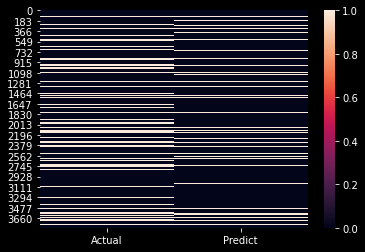

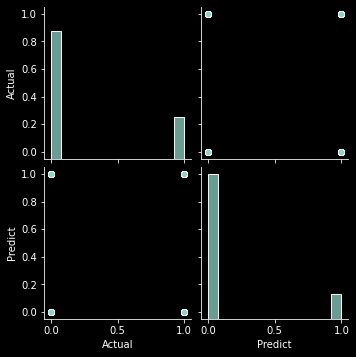

In [44]:
sns.heatmap(df_comp)
sns.pairplot(df_comp)

In [47]:
print (df_comp.sum())


Actual     950.0
Predict    561.0
dtype: float64


([<matplotlib.patches.Wedge at 0x1ea94cd9af0>,
 [Text(-0.7726993358016642, 0.7829021244393627, 'Looking for a job change'),
  Text(0.7726994091022475, -0.7829020520940264, 'Not Looking for a job change')],
 [Text(-0.42147236498272583, 0.42703752242147053, '25%'),
  Text(0.42147240496486227, -0.42703748296037797, '75%')])

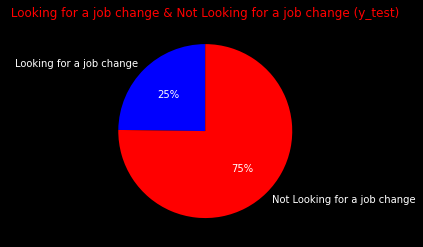

In [49]:
data = [950,2882]
names = ['Looking for a job change','Not Looking for a job change']
plt.title (' Looking for a job change & Not Looking for a job change (y_test) ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

([<matplotlib.patches.Wedge at 0x1eaa2af6f10>,
 [Text(-0.48826923512114373, 0.9856942497723183, 'Looking for a job change'),
  Text(0.48826932740849743, -0.9856942040572491, 'Not Looking for a job change')],
 [Text(-0.266328673702442, 0.537651408966719, '15%'),
  Text(0.26632872404099855, -0.5376513840312267, '85%')])

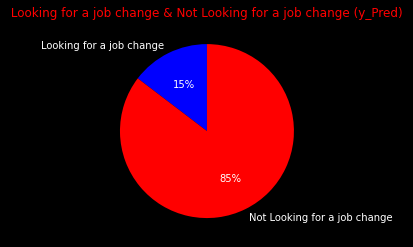

In [51]:
data = [561,3271]
names = ['Looking for a job change','Not Looking for a job change']
plt.title (' Looking for a job change & Not Looking for a job change (y_Pred) ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)